In [1]:
import pandas as pd

# Load the dataset
file_path = 'Sample - Superstore.xlsx'
superstore_data = pd.read_excel(file_path)

# Display the first few rows of the dataset
superstore_data.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1.0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2.0,0.00,41.9136
1,2.0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3.0,0.00,219.5820
2,3.0,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,0.00,6.8714
3,4.0,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310
4,5.0,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2.0,0.20,2.5164


In [ ]:
#Next, we will explore the data to identify any missing values, outliers, or anomalies.

In [2]:
# Check for missing values
missing_values = superstore_data.isnull().sum()

# Display the missing values
missing_values


Row ID            9
Order ID         13
Order Date       13
Ship Date        15
Ship Mode        19
Customer ID      26
Customer Name    57
Segment          52
Country          64
City             45
State            57
Postal Code      37
Region           40
Product ID       38
Category         29
Sub-Category     42
Product Name     58
Sales            62
Quantity         46
Discount         37
Profit           50
dtype: int64

In [5]:
# Check for missing values
missing_values = superstore_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Ensure numeric columns contain only numeric data
# List of numeric columns to check and clean
numeric_columns = ['Sales', 'Quantity', 'Discount', 'Profit']

# Convert numeric columns to appropriate data types
for column in numeric_columns:
    superstore_data[column] = pd.to_numeric(superstore_data[column], errors='coerce')

# Check for missing values again after conversion
missing_values_after_conversion = superstore_data.isnull().sum()
print("Missing values after conversion:\n", missing_values_after_conversion)

# Fill missing numerical values with median
for column in numeric_columns:
    median_value = superstore_data[column].median()
    superstore_data[column].fillna(median_value, inplace=True)

# Drop rows with missing categorical values
superstore_data.dropna(inplace=True)



Missing values in each column:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64
Missing values after conversion:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


C:\Users\amanu\AppData\Local\Temp\ipykernel_22812\1930059325.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  superstore_data[column].fillna(median_value, inplace=True)
C:\Users\amanu\AppData\Local\Temp\ipykernel_22812\1930059325.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [6]:
# Verify that there are no more missing values
missing_values_final = superstore_data.isnull().sum()
print("Final missing values:\n", missing_values_final)


Final missing values:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [ ]:
# Descriptive Analysis

In [17]:
# Generate descriptive statistics for key variables
descriptive_stats = superstore_data[['Sales', 'Quantity', 'Discount', 'Profit']].describe()
print("Descriptive statistics:\n", descriptive_stats)


Descriptive statistics:
               Sales     Quantity     Discount       Profit
count   9847.000000  9847.000000  9847.000000  9847.000000
mean     229.868833     4.378517     0.164247    28.862491
std      625.780556    33.881437     0.306654   235.655717
min        0.444000     1.000000     0.000000 -6599.978000
25%       17.360000     2.000000     0.000000     1.725500
50%       54.768000     3.000000     0.200000     8.641350
75%      209.746000     5.000000     0.200000    29.364000
max    22638.480000  2887.056000    11.000000  8399.976000


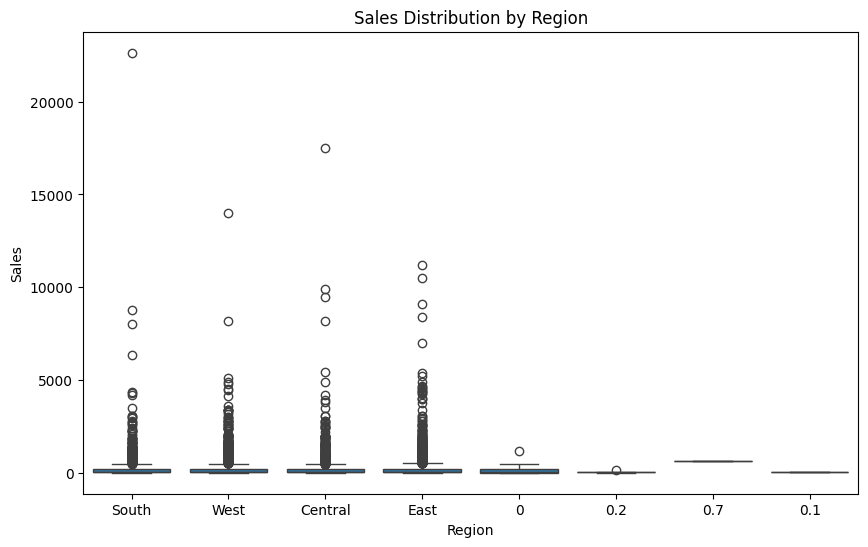

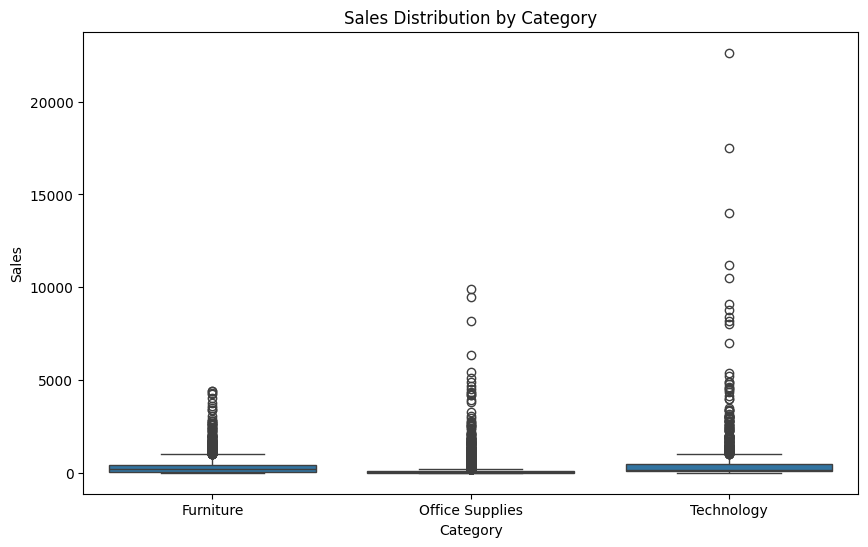

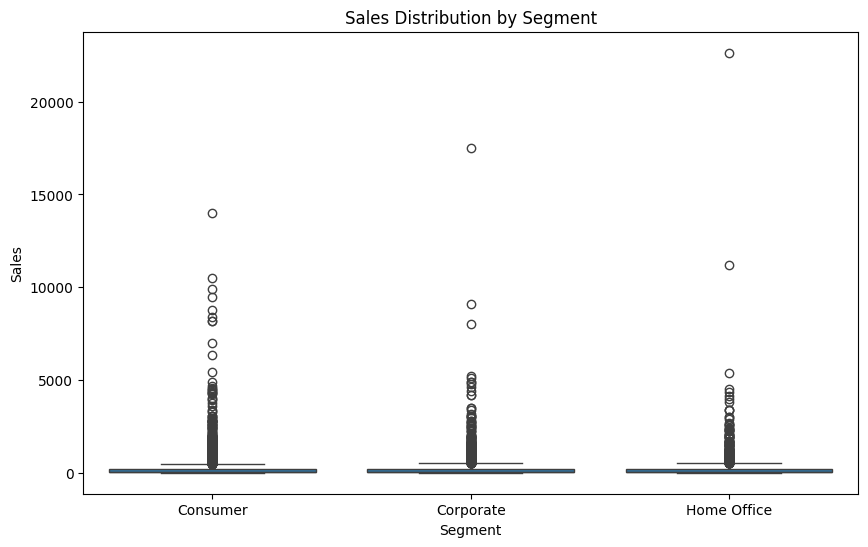

In [18]:
# Sales distribution across different regions
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Sales', data=superstore_data)
plt.title('Sales Distribution by Region')
plt.show()

# Sales distribution across different categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Sales', data=superstore_data)
plt.title('Sales Distribution by Category')
plt.show()

# Sales distribution across different segments
plt.figure(figsize=(10, 6))
sns.boxplot(x='Segment', y='Sales', data=superstore_data)
plt.title('Sales Distribution by Segment')
plt.show()


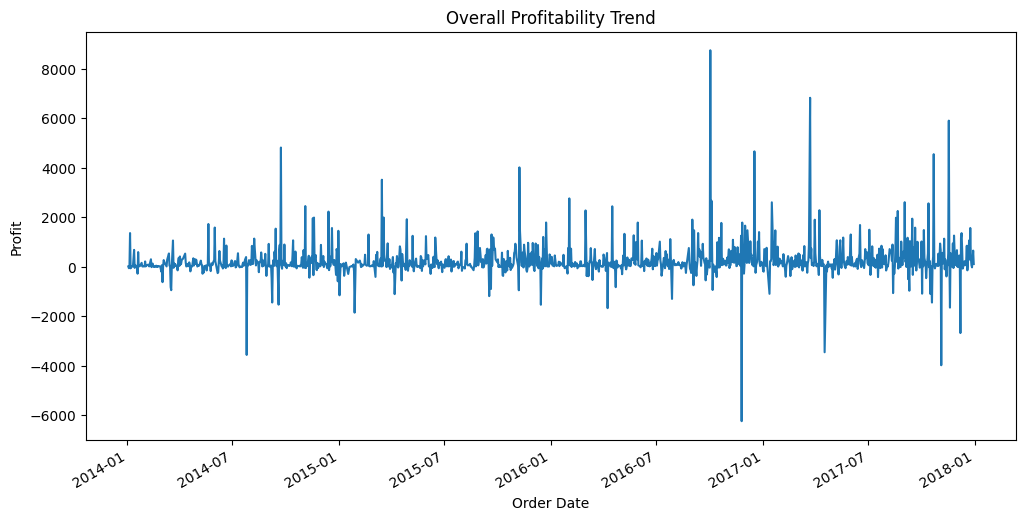

In [19]:
# Overall profitability trend
profit_trend = superstore_data.groupby('Order Date')['Profit'].sum()
plt.figure(figsize=(12, 6))
profit_trend.plot(title='Overall Profitability Trend')
plt.ylabel('Profit')
plt.show()


In [20]:
# Least profitable products
least_profitable_products = superstore_data.groupby('Product Name')['Profit'].sum().nsmallest(10)
print("Least Profitable Products:\n", least_profitable_products)

# Least profitable categories
least_profitable_categories = superstore_data.groupby('Category')['Profit'].sum().nsmallest(10)
print("Least Profitable Categories:\n", least_profitable_categories)


Least Profitable Products:
 Product Name
Cubify CubeX 3D Printer Double Head Print                                      -8879.9704
Lexmark MX611dhe Monochrome Laser Printer                                      -4589.9730
Cubify CubeX 3D Printer Triple Head Print                                      -3839.9904
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases                       -2876.1156
Bush Advantage Collection Racetrack Conference Table                           -1934.3976
GBC DocuBind P400 Electric Binding System                                      -1878.1662
Cisco TelePresence System EX90 Videoconferencing Unit                          -1811.0784
Martin Yale Chadless Opener Electric Letter Opener                             -1299.1836
Balt Solid Wood Round Tables                                                   -1201.0581
Riverside Furniture Oval Coffee Table, Oval End Table, End Table with Drawer   -1147.4000
Name: Profit, dtype: float64
Least Profitable Categories:
 

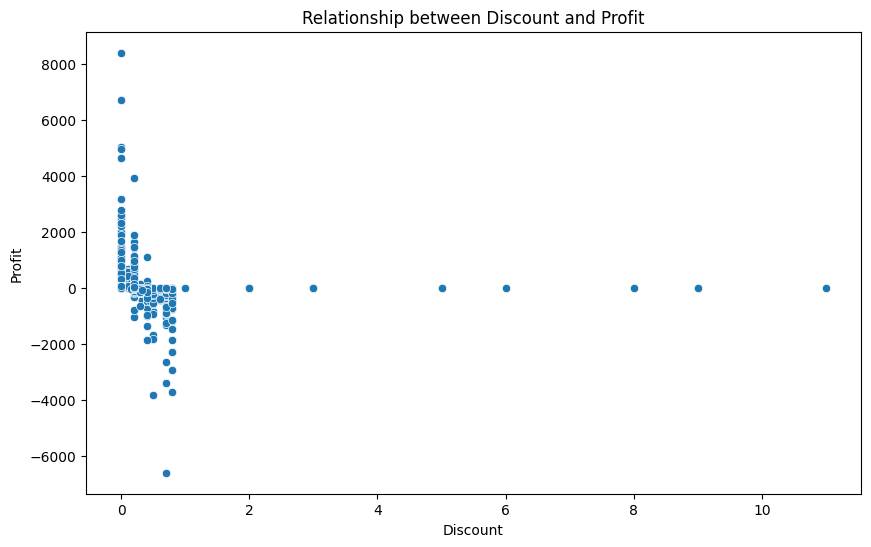

In [21]:
# Relationship between discount and profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Profit', data=superstore_data)
plt.title('Relationship between Discount and Profit')
plt.show()


In [ ]:
#Statistical Analysis

In [22]:
# Performance of different customer segments
segment_performance = superstore_data.groupby('Segment')[['Sales', 'Quantity', 'Profit']].sum()
print("Segment Performance:\n", segment_performance)


Segment Performance:
                     Sales   Quantity        Profit
Segment                                           
Consumer     1.146044e+06  21745.814  133580.54820
Corporate    6.928522e+05  14739.442   90349.29795
Home Office  4.246221e+05   6630.000   60279.10740


In [23]:
# Contribution of each product category to overall sales
category_contribution = superstore_data.groupby('Category')['Sales'].sum()
print("Category Contribution to Sales:\n", category_contribution)


Category Contribution to Sales:
 Category
Furniture          724688.9923
Office Supplies    711922.0820
Technology         826907.3230
Name: Sales, dtype: float64


In [24]:
from scipy.stats import f_oneway

# ANOVA test to compare mean sales across different regions
regions = superstore_data['Region'].unique()
region_sales = [superstore_data[superstore_data['Region'] == region]['Sales'] for region in regions]

anova_result = f_oneway(*region_sales)
print("ANOVA Result:\n", anova_result)


ANOVA Result:
 F_onewayResult(statistic=0.49887679259063, pvalue=0.8360292773324067)


In [25]:
import itertools
from scipy.stats import ttest_ind

# Pairwise comparisons
pairwise_comparisons = {}
for region1, region2 in itertools.combinations(regions, 2):
    sales1 = superstore_data[superstore_data['Region'] == region1]['Sales']
    sales2 = superstore_data[superstore_data['Region'] == region2]['Sales']
    t_stat, p_value = ttest_ind(sales1, sales2)
    pairwise_comparisons[f'{region1} vs {region2}'] = p_value

print("Pairwise Comparisons:\n", pairwise_comparisons)


Pairwise Comparisons:
 {'South vs West': 0.3977957601916289, 'South vs Central': 0.26486138495636163, 'South vs East': 0.9247500572431905, 'South vs 0': 0.8482490707888369, 'South vs 0.2': 0.5539684372642063, 'South vs 0.7': 0.6259127470914279, 'South vs 0.1': 0.7824899382786689, 'West vs Central': 0.5555672391179326, 'West vs East': 0.3430590451546289, 'West vs 0': 0.8555272628724566, 'West vs 0.2': 0.4219210890248394, 'West vs 0.7': 0.4506658395592422, 'West vs 0.1': 0.7046775207129259, 'Central vs East': 0.1878323529459064, 'Central vs 0': 0.9190124467347645, 'Central vs 0.2': 0.5310435199647245, 'Central vs 0.7': 0.5243756667367958, 'Central vs 0.1': 0.7657719134373363, 'East vs 0': 0.8196437329826344, 'East vs 0.2': 0.46510507613303853, 'East vs 0.7': 0.5408778710541304, 'East vs 0.1': 0.7329444227173485, '0 vs 0.2': 0.35235492736020113, '0 vs 0.7': 0.28269520028957773, '0 vs 0.1': 0.6590549264378982, '0.2 vs 0.7': 0.0001854969309927307, '0.2 vs 0.1': 0.6617862940111755, '0.7 vs 0

C:\Users\amanu\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:6951: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df


In [26]:
# Placeholder for geospatial visualization
# Assuming we have geospatial data
# Create geospatial visualization
# plt.figure(figsize=(12, 8))
# gdf.plot(column='Sales', cmap='OrRd', legend=True)
# plt.title('Sales Distribution Across Different States')
# plt.show()

# Note: Actual implementation requires geospatial data.


NameError: name 'gdf' is not defined

<Figure size 1200x800 with 0 Axes>

In [27]:
# Top-performing products
top_performing_products = superstore_data.groupby('Product Name')[['Sales', 'Profit']].sum().nlargest(10, 'Sales')
print("Top Performing Products:\n", top_performing_products)

# Underperforming products
underperforming_products = superstore_data.groupby('Product Name')[['Sales', 'Profit']].sum().nsmallest(10, 'Sales')
print("Underperforming Products:\n", underperforming_products)


Top Performing Products:
                                                         Sales        Profit
Product Name                                                               
Canon imageCLASS 2200 Advanced Copier               61599.824  2.519993e+04
Fellowes PB500 Electric Punch Plastic Comb Bind...  27453.384  7.753039e+03
Cisco TelePresence System EX90 Videoconferencin...  22638.480 -1.811078e+03
HON 5400 Series Task Chairs for Big and Tall        21870.576  3.979039e-13
GBC DocuBind TL300 Electric Binding System          19823.479  2.233505e+03
GBC Ibimaster 500 Manual ProClick Binding System    19024.500  7.609800e+02
Hewlett Packard LaserJet 3310 Copier                18839.686  6.983884e+03
HP Designjet T520 Inkjet Large Format Printer -...  18374.895  4.094977e+03
GBC DocuBind P400 Electric Binding System           17965.068 -1.878166e+03
High Speed Automatic Electric Letter Opener         17030.312 -2.620048e+02
Underperforming Products:
                                    

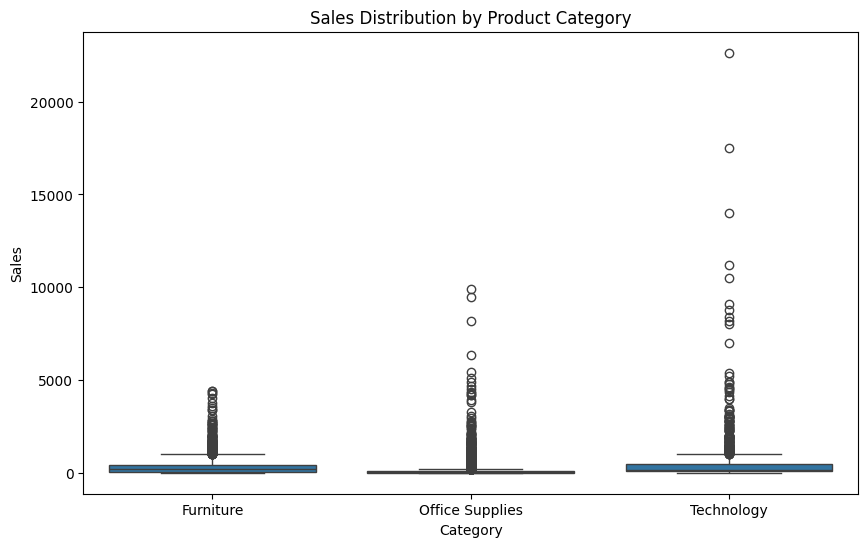

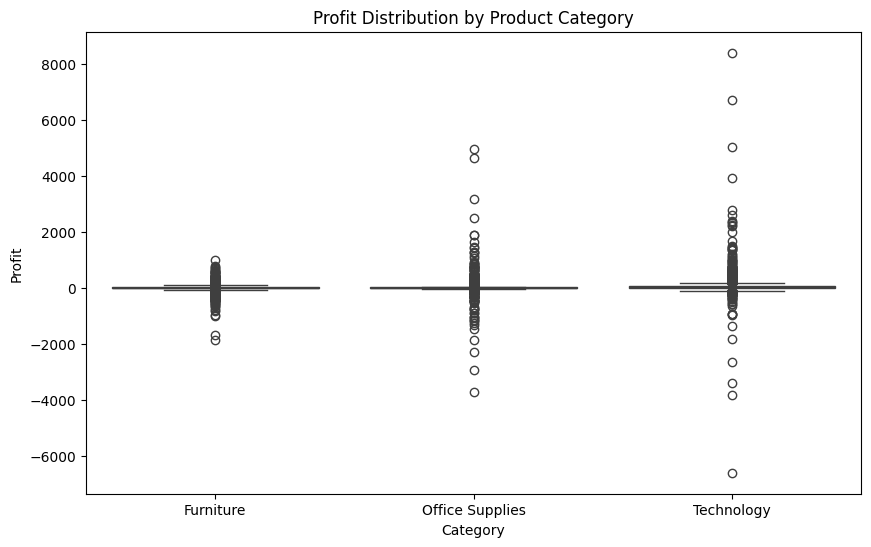

In [28]:
# Sales and profit distribution for different products
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Sales', data=superstore_data)
plt.title('Sales Distribution by Product Category')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Profit', data=superstore_data)
plt.title('Profit Distribution by Product Category')
plt.show()


In [ ]:
#Hypothesis Testing

In [29]:
import statsmodels.api as sm

# Hypothesis: The impact of discounts on sales
# H0: There is no significant impact of discounts on sales
# H1: There is a significant impact of discounts on sales

# Perform linear regression to test the hypothesis
X = superstore_data[['Discount']]
y = superstore_data['Sales']
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Display the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     7.053
Date:                Mon, 20 May 2024   Prob (F-statistic):            0.00792
Time:                        21:21:39   Log-Likelihood:                -77373.
No. Observations:                9847   AIC:                         1.548e+05
Df Residuals:                    9845   BIC:                         1.548e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        238.8370      7.152     33.396      0.0

In [ ]:
#Probability Analysis

In [30]:
# Probability of an order being shipped using the "Standard Class" mode
prob_standard_class = len(superstore_data[superstore_data['Ship Mode'] == 'Standard Class']) / len(superstore_data)

# Probability of an order being shipped using "Second Class" mode being from the West region
prob_second_class_west = len(superstore_data[(superstore_data['Ship Mode'] == 'Second Class') & (superstore_data['Region'] == 'West')]) / len(superstore_data[superstore_data['Ship Mode'] == 'Second Class'])

# Probability of a customer belonging to the "Corporate" segment
prob_corporate_segment = len(superstore_data[superstore_data['Segment'] == 'Corporate']) / len(superstore_data)

# Probability of a customer from the "Home Office" segment being from the East region
prob_home_office_east = len(superstore_data[(superstore_data['Segment'] == 'Home Office') & (superstore_data['Region'] == 'East')]) / len(superstore_data[superstore_data['Segment'] == 'Home Office'])

# Probability of a product having a discount greater than 20%
prob_discount_gt_20 = len(superstore_data[superstore_data['Discount'] > 0.2]) / len(superstore_data)

# Probability of a product with a discount being from the "Office Supplies" category
prob_discount_office_supplies = len(superstore_data[(superstore_data['Discount'] > 0) & (superstore_data['Category'] == 'Office Supplies')]) / len(superstore_data[superstore_data['Discount'] > 0])

# Probability of a product having a negative profit
prob_negative_profit = len(superstore_data[superstore_data['Profit'] < 0]) / len(superstore_data)

# Probability of a product in the "Furniture" category having a positive profit
prob_furniture_positive_profit = len(superstore_data[(superstore_data['Category'] == 'Furniture') & (superstore_data['Profit'] > 0)]) / len(superstore_data[superstore_data['Category'] == 'Furniture'])

# Probability of an order being shipped to California
prob_order_to_california = len(superstore_data[superstore_data['State'] == 'California']) / len(superstore_data)

# Probability of an order shipped to New York being from the "Consumer" segment
prob_new_york_consumer = len(superstore_data[(superstore_data['State'] == 'New York') & (superstore_data['Segment'] == 'Consumer')]) / len(superstore_data[superstore_data['State'] == 'New York'])

# Display the probabilities
probabilities = {
    'Standard Class': prob_standard_class,
    'Second Class from West': prob_second_class_west,
    'Corporate Segment': prob_corporate_segment,
    'Home Office from East': prob_home_office_east,
    'Discount > 20%': prob_discount_gt_20,
    'Discount from Office Supplies': prob_discount_office_supplies,
    'Negative Profit': prob_negative_profit,
    'Furniture Positive Profit': prob_furniture_positive_profit,
    'Order to California': prob_order_to_california,
    'New York Consumer': prob_new_york_consumer,
}

print("Probabilities:\n", probabilities)


Probabilities:
 {'Standard Class': 0.5968315222910531, 'Second Class from West': 0.3179916317991632, 'Corporate Segment': 0.3022240276226262, 'Home Office from East': 0.28285714285714286, 'Discount > 20%': 0.1403473139027115, 'Discount from Office Supplies': 0.5580531665363565, 'Negative Profit': 0.185741850309739, 'Furniture Positive Profit': 0.649400479616307, 'Order to California': 0.19995937849091094, 'New York Consumer': 0.5716845878136201}
